In [1]:
# Data Collection
import pandas as pd
import numpy as np

#Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# Data partitioning and model tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold

# Calling regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Model Evaluation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Determining the explanatory power of a model (SHAP) 
import shap  




In [2]:
df = pd.read_csv(r"C:\Users\Rasulbek_Ruzmetov\Desktop\RUNNING\DATA\Data_Preprocessing\Pre_Processed.csv")

In [3]:
df.to_csv(r"C:\Users\Rasulbek_Ruzmetov\Desktop\RUNNING\DATA\Feature_Enginering\Feature_Enginering.csv", index=False)


In [2]:
df = pd.read_csv(r"C:\Users\Rasulbek_Ruzmetov\Desktop\RUNNING\DATA\Feature_Enginering\Feature_Enginering.csv")

In [5]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete age category,Athlete average speed,Athlete ID,Athlete gender_F,Athlete gender_M,Athlete gender_X
0,-1.59427,-1.055935,0.822487,-0.648076,-0.51591,-0.665727,1.556298,-0.222718,-1.339872,-0.225102,1.253139,-1.263861,-0.545327,0.545356,-0.004321
1,-1.59427,-1.055935,0.822487,-0.648076,-0.51591,-0.735591,0.760888,1.205240,-1.443041,-0.096891,0.995850,-1.399700,-0.545327,0.545356,-0.004321
2,-1.59427,-1.055935,0.822487,-0.648076,-0.51591,-0.802330,1.536146,1.205240,-0.927196,2.082690,0.863329,-1.233530,1.833762,-1.833665,-0.004321
3,-1.59427,-1.055935,0.822487,-0.648076,-0.51591,-0.805024,0.760888,1.205240,-1.030365,-0.225102,0.809804,-1.363523,-0.545327,0.545356,-0.004321
4,-1.59427,-1.055935,0.822487,-0.648076,-0.51591,-0.870227,1.556298,-0.222718,-1.855716,0.031319,0.738561,-1.270684,-0.545327,0.545356,-0.004321


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071405 entries, 0 to 1071404
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Year of event              1071405 non-null  float64
 1   Event dates                1071405 non-null  float64
 2   Event name                 1071405 non-null  float64
 3   Event distance/length      1071405 non-null  float64
 4   Event number of finishers  1071405 non-null  float64
 5   Athlete performance        1071405 non-null  float64
 6   Athlete club               1071405 non-null  float64
 7   Athlete country            1071405 non-null  float64
 8   Athlete year of birth      1071405 non-null  float64
 9   Athlete age category       1071405 non-null  float64
 10  Athlete average speed      1071405 non-null  float64
 11  Athlete ID                 1071405 non-null  float64
 12  Athlete gender_F           1071405 non-null  float64
 13  Athlete gend

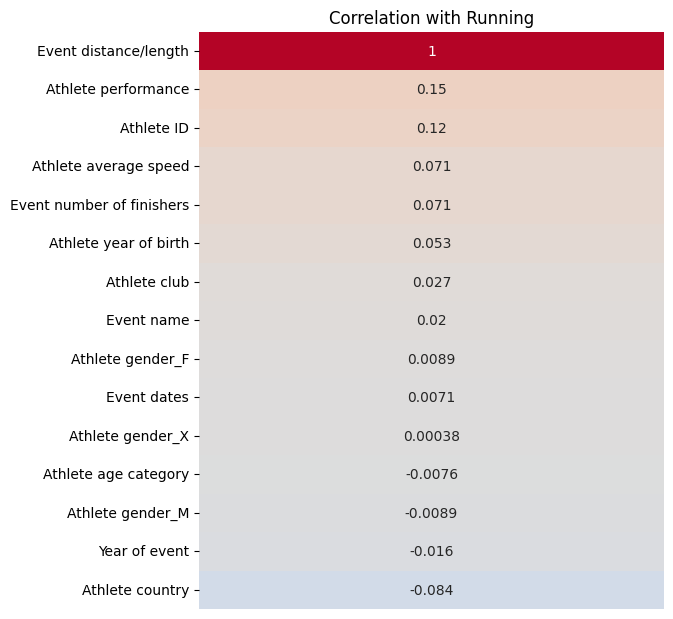

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns


corr_matrix = df[numeric_cols].corr()


corr_target = corr_matrix['Event distance/length'].sort_values(ascending=False)


corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with Running')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()


In [7]:
zero_columns = df.columns.tolist()
for col in zero_columns:
    zero_count = (df[col] == 0).sum()
    print(f"{col} the number of 0 values in the column: {zero_count}")

Year of event the number of 0 values in the column: 0
Event dates the number of 0 values in the column: 0
Event name the number of 0 values in the column: 0
Event distance/length the number of 0 values in the column: 0
Event number of finishers the number of 0 values in the column: 0
Athlete performance the number of 0 values in the column: 0
Athlete club the number of 0 values in the column: 0
Athlete country the number of 0 values in the column: 0
Athlete year of birth the number of 0 values in the column: 0
Athlete age category the number of 0 values in the column: 0
Athlete average speed the number of 0 values in the column: 0
Athlete ID the number of 0 values in the column: 0
Athlete gender_F the number of 0 values in the column: 0
Athlete gender_M the number of 0 values in the column: 0
Athlete gender_X the number of 0 values in the column: 0


In [8]:
print(df.columns.tolist())

['Year of event', 'Event dates', 'Event name', 'Event distance/length', 'Event number of finishers', 'Athlete performance', 'Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category', 'Athlete average speed', 'Athlete ID', 'Athlete gender_F', 'Athlete gender_M', 'Athlete gender_X']


## 🛠️ Feature Engineering

In [3]:
# 1. Yoshni hisoblash
df["Athlete age"] = df["Year of event"] - df["Athlete year of birth"]

# 2. Event distance/length -> km formatiga o'tkazish (agar "42.195 km" kabi bo'lsa)
df["Event distance_km"] = (
    df["Event distance/length"]
    .astype(str)   # stringga o‘tkazib olish
    .str.extract(r'(\d+\.?\d*)')  # raqamlarni ajratib olish
    .astype(float) # floatga o‘tkazish
)

# 3. Musobaqa kattaligi -> kichik / o'rta / katta
def race_size(n):
    if n < 500:
        return 0   # Small
    elif n < 5000:
        return 1   # Medium
    else:
        return 2   # Large

df["Race size"] = df["Event number of finishers"].apply(race_size)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071405 entries, 0 to 1071404
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Year of event              1071405 non-null  float64
 1   Event dates                1071405 non-null  float64
 2   Event name                 1071405 non-null  float64
 3   Event distance/length      1071405 non-null  float64
 4   Event number of finishers  1071405 non-null  float64
 5   Athlete performance        1071405 non-null  float64
 6   Athlete club               1071405 non-null  float64
 7   Athlete country            1071405 non-null  float64
 8   Athlete year of birth      1071405 non-null  float64
 9   Athlete age category       1071405 non-null  float64
 10  Athlete average speed      1071405 non-null  float64
 11  Athlete ID                 1071405 non-null  float64
 12  Athlete gender_F           1071405 non-null  float64
 13  Athlete gend

In [15]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete age category,Athlete average speed,Athlete ID,Athlete gender_F,Athlete gender_M,Athlete gender_X,Athlete age,Event distance_km,Race size
0,-1.59427,-1.055935,0.822487,-0.648076,-0.51591,-0.665727,1.556298,-0.222718,-1.339872,-0.225102,1.253139,-1.263861,-0.545327,0.545356,-0.004321,-0.254398,0.648076,0
1,-1.59427,-1.055935,0.822487,-0.648076,-0.51591,-0.735591,0.760888,1.205240,-1.443041,-0.096891,0.995850,-1.399700,-0.545327,0.545356,-0.004321,-0.151229,0.648076,0
2,-1.59427,-1.055935,0.822487,-0.648076,-0.51591,-0.802330,1.536146,1.205240,-0.927196,2.082690,0.863329,-1.233530,1.833762,-1.833665,-0.004321,-0.667074,0.648076,0
3,-1.59427,-1.055935,0.822487,-0.648076,-0.51591,-0.805024,0.760888,1.205240,-1.030365,-0.225102,0.809804,-1.363523,-0.545327,0.545356,-0.004321,-0.563905,0.648076,0
4,-1.59427,-1.055935,0.822487,-0.648076,-0.51591,-0.870227,1.556298,-0.222718,-1.855716,0.031319,0.738561,-1.270684,-0.545327,0.545356,-0.004321,0.261446,0.648076,0


# 📊 Skewness (Og‘malik)

**Skewness** — ma’lumot taqsimotining chapga yoki o‘ngga og‘ishi.  
Normal taqsimot (`bell curve`) simmetrik bo‘ladi, lekin ko‘p real ma’lumotlar og‘malikka ega.  

### 🔹 Turlari
- **Right-skewed (Positive skew)**  
  O‘rtachadan katta qiymatlar ko‘p.  
  *Misol:* odamlarning daromadlari, marafon finish vaqtlari.  

- **Left-skewed (Negative skew)**  
  O‘rtachadan kichik qiymatlar ko‘p.  
  *Misol:* imtihon natijalari (ko‘pchilik yuqori ball olsa).  


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Skewness check + distribution visualization ---
def skewness_check(df, target_col):
    skew_value = df[target_col].skew()
    print(f"📊 {target_col} Skewness: {skew_value:.4f}")
    print(df[target_col].describe())
    print("\n")

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[target_col], kde=True)
    plt.title(f'{target_col} distribution (Histogram + KDE)')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[target_col])
    plt.title(f'{target_col} value spread (Boxplot)')

    plt.show()


📊 Event distance/length Skewness: -0.6707
count    1.071405e+06
mean    -7.639924e-18
std      1.000000e+00
min     -1.915388e+00
25%     -6.480757e-01
50%      2.895294e-01
75%      6.158022e-01
max      1.762909e+00
Name: Event distance/length, dtype: float64




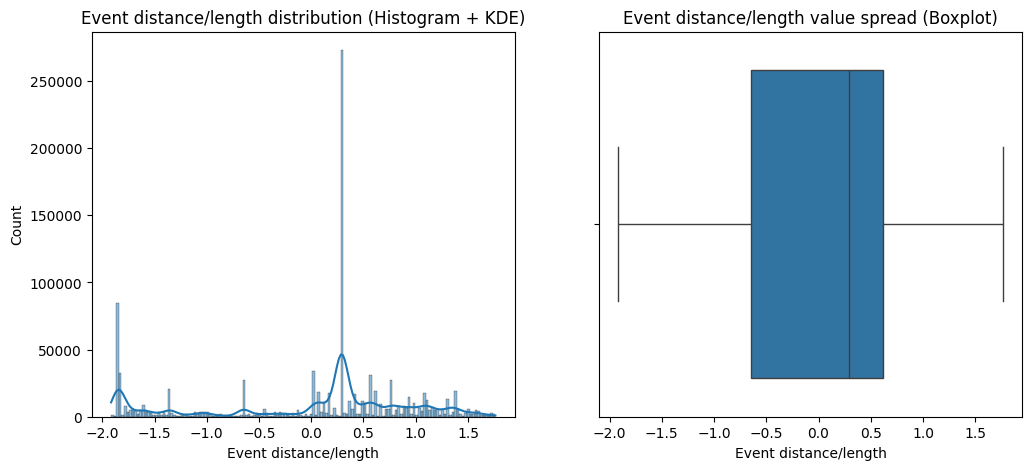

In [17]:
skewness_check(df, "Event distance/length") 

### 📊 Xulosalar:

- **Skewness < 0** → taqsimot **chapga og‘gan (left-skewed)**.  
- Ya’ni, **ko‘proq katta qiymatlar bor**, kichik qiymatlar esa chap tomonda **uzun dum** hosil qilgan.  
- **Qiymat ≈ -0.67** → bu juda katta og‘malik emas.  

#### Skewness qiymati bo‘yicha tahlil:
- `|skew| < 0.5` → deyarli normal  
- `0.5 ≤ |skew| ≤ 1` → biroz og‘ma (**moderat skew**) ✅  
- `|skew| > 1` → juda og‘ma  


# 📉 Log-transformatsiya

**Log-transformatsiya** — katta qiymatlarni siqib, kichik qiymatlarni deyarli o‘zgartirmaydi.  

### ✨ Natija:
- Taqsimot ko‘proq **normal (simmetrik)** ko‘rinishga keladi.  
- Ayniqsa **right-skewed** (o‘ng tomonda uzun dumli) taqsimotlarni to‘g‘rilashda ishlatiladi.  

In [18]:
def log_transform_check(df, target_col):
    new_col = target_col + '_log'
    df[new_col] = np.log1p(df[target_col])  # log(1+x) transform
    skew_value = df[new_col].skew()
    
    print(f"📉 After log transform → {new_col} Skewness: {skew_value:.4f}")
    print(df[new_col].describe())
    print("\n")

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[new_col], kde=True)
    plt.title(f'{new_col} distribution (Histogram + KDE)')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[new_col])
    plt.title(f'{new_col} value spread (Boxplot)')

    plt.show()

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


📉 After log transform → Event distance/length_log Skewness: -4.7881
count    837612.000000
mean          0.272598
std           0.610406
min          -6.431350
25%           0.254277
50%           0.256937
75%           0.573117
max           1.016284
Name: Event distance/length_log, dtype: float64




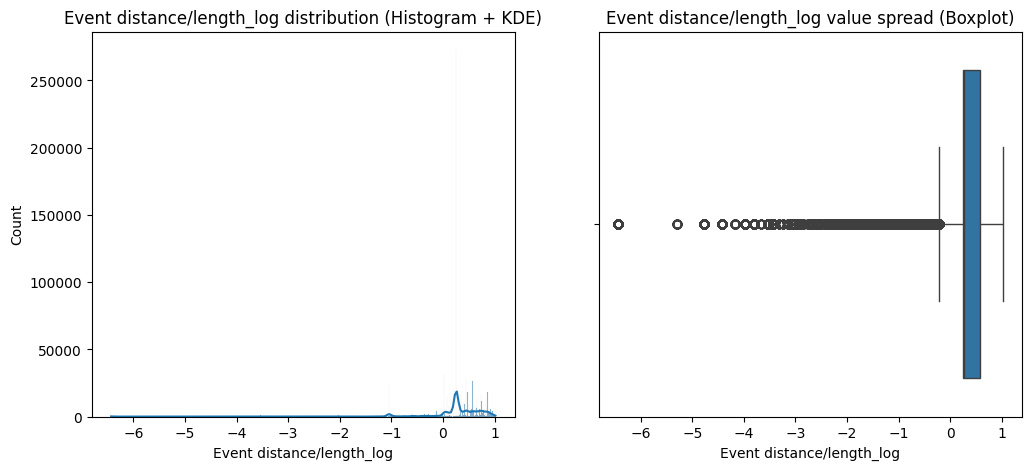

In [19]:
log_transform_check(df, "Event distance/length")

### 📊 Oldingi holat (`Event distance/length`)
- **Skewness ≈ -0.67** → biroz **chapga og‘malik (moderate left-skewed)**  
- Taqsimot asosan **normalga yaqin**, unchalik katta muammo emas edi.  

---

### 📉 Log transformdan keyin (`Event distance/length_log`)
- **Skewness ≈ -4.79** → juda kuchli **chapga og‘malik** paydo bo‘ldi ❌  
- Demak, log-transformatsiya taqsimotni **yaxshilamadi**, balki **yomonlashtirdi**.  

#### Statistikalar:
- **min = -6.43** → `log1p(0)` yoki manfiy qiymatlar tufayli juda kichik qiymatlar chiqib ketgan.  
- **count kamaygan (1.07 mln → 837k)** → `NaN` qiymatlar paydo bo‘lgan.  

---

### ✅ Xulosa
- Bu ustunda **log-transform qo‘llash to‘g‘ri emas**.  
- Chunki `Event distance/length` allaqachon **normalga yaqin taqsimot**ga ega edi.  
- Log-transformatsiya o‘rniga:  
  - **StandardScaler**  
  - yoki **Min-Max scaling**  
  qo‘llash kifoya qiladi.  


# Min Max Scaler qilamiz 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071405 entries, 0 to 1071404
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Year of event              1071405 non-null  float64
 1   Event dates                1071405 non-null  float64
 2   Event name                 1071405 non-null  float64
 3   Event distance/length      1071405 non-null  float64
 4   Event number of finishers  1071405 non-null  float64
 5   Athlete performance        1071405 non-null  float64
 6   Athlete club               1071405 non-null  float64
 7   Athlete country            1071405 non-null  float64
 8   Athlete year of birth      1071405 non-null  float64
 9   Athlete age category       1071405 non-null  float64
 10  Athlete average speed      1071405 non-null  float64
 11  Athlete ID                 1071405 non-null  float64
 12  Athlete gender_F           1071405 non-null  float64
 13  Athlete gend

In [21]:
df.describe()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete age category,Athlete average speed,Athlete ID,Athlete gender_F,Athlete gender_M,Athlete gender_X,Athlete age,Event distance_km,Race size,Event distance/length_log
count,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1071405.0,837612.000000
mean,-1.067807e-13,8.998132e-17,6.366603e-18,-7.639924e-18,1.612873e-17,3.289412e-17,1.986380e-16,-7.724812e-17,5.484001e-14,3.798740e-17,1.179944e-16,5.602611e-17,1.373064e-16,4.891673e-17,6.340075e-17,-1.613611e-13,8.058206e-01,0.0,0.272598
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.394650e+00,5.921600e-01,0.0,0.610406
min,-1.594270e+00,-1.824441e+00,-1.922945e+00,-1.915388e+00,-5.803162e-01,-1.530902e+00,-1.942038e+00,-1.707042e+00,-8.098627e+01,-1.122577e+00,-3.806631e+00,-1.412227e+00,-5.453271e-01,-1.833665e+00,-4.320582e-03,-5.722351e+00,1.035498e-03,0.0,-6.431350
25%,-2.990707e-01,-8.569282e-01,-8.126601e-01,-6.480757e-01,-4.701484e-01,-1.122869e+00,-9.882266e-01,-7.675960e-01,-6.176893e-01,-6.097339e-01,-3.500260e-01,-9.929001e-01,-5.453271e-01,5.453559e-01,-4.320582e-03,-9.765808e-01,2.895294e-01,0.0,0.254277
50%,-2.990707e-01,4.283716e-02,-2.607550e-02,2.895294e-01,-3.226930e-01,5.335768e-01,7.608879e-01,-2.790843e-01,4.691579e-14,-3.533126e-01,1.486789e-01,-5.198621e-02,-5.453271e-01,5.453559e-01,-4.320582e-03,9.111859e-03,6.158022e-01,0.0,0.256937
75%,9.961287e-01,8.875581e-01,9.336923e-01,6.158022e-01,2.814898e-02,9.361534e-01,7.608879e-01,1.205240e+00,7.235065e-01,3.131932e-02,6.215442e-01,9.858768e-01,-5.453271e-01,5.453559e-01,-4.320582e-03,9.961287e-01,1.341835e+00,0.0,0.573117
max,9.961287e-01,1.744982e+00,1.672466e+00,1.762909e+00,8.411070e+00,1.173151e+00,1.618388e+00,1.468284e+00,4.437587e+00,3.236586e+00,1.569120e+00,1.506522e+00,1.833762e+00,5.453559e-01,2.314503e+02,7.939200e+01,1.915388e+00,0.0,1.016284


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


print(df[numeric_cols].head())


   Year of event  Event dates  Event name  Event distance/length  \
0            0.0     0.215302    0.763593               0.344538   
1            0.0     0.215302    0.763593               0.344538   
2            0.0     0.215302    0.763593               0.344538   
3            0.0     0.215302    0.763593               0.344538   
4            0.0     0.215302    0.763593               0.344538   

   Event number of finishers  Athlete performance  Athlete club  \
0                   0.007163             0.319955      0.982561   
1                   0.007163             0.294118      0.759158   
2                   0.007163             0.269437      0.976901   
3                   0.007163             0.268441      0.759158   
4                   0.007163             0.244328      0.982561   

   Athlete country  Athlete year of birth  Athlete age category  \
0         0.467456               0.932367              0.205882   
1         0.917160               0.931159             

In [7]:
df.describe()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete age category,Athlete average speed,Athlete ID,Athlete gender_F,Athlete gender_M,Athlete gender_X,Athlete age,Event distance_km,Race size
count,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1.071405e+06,1071405.0
mean,6.154535e-01,5.111305e-01,5.348332e-01,5.207269e-01,6.454135e-02,5.661509e-01,5.454510e-01,5.375957e-01,9.480521e-01,2.575212e-01,7.081114e-01,4.838466e-01,2.292168e-01,7.707646e-01,1.866708e-05,6.723133e-02,4.203954e-01,0.0
std,3.860411e-01,2.801575e-01,2.781325e-01,2.718651e-01,1.112176e-01,3.698154e-01,2.808654e-01,3.149284e-01,1.170634e-02,2.294020e-01,1.860206e-01,3.426127e-01,4.203292e-01,4.203412e-01,4.320503e-03,1.638560e-02,3.093265e-01,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,5.000000e-01,2.710558e-01,3.088061e-01,3.445378e-01,1.225259e-02,1.508969e-01,2.678925e-01,2.958580e-01,9.408213e-01,1.176471e-01,6.429994e-01,1.436666e-01,0.000000e+00,1.000000e+00,0.000000e+00,5.575758e-02,1.507005e-01,0.0
50%,5.000000e-01,5.231317e-01,5.275808e-01,5.994398e-01,2.865221e-02,7.634757e-01,7.591579e-01,4.497041e-01,9.480521e-01,1.764706e-01,7.357687e-01,4.660355e-01,0.000000e+00,1.000000e+00,0.000000e+00,6.733838e-02,3.211356e-01,0.0
75%,1.000000e+00,7.597865e-01,7.945232e-01,6.881419e-01,6.767201e-02,9.123546e-01,7.591579e-01,9.171598e-01,9.565217e-01,2.647059e-01,8.237314e-01,8.216203e-01,0.000000e+00,1.000000e+00,0.000000e+00,7.893474e-02,7.003931e-01,0.0
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0


In [10]:
df.to_csv(r"C:\Users\Rasulbek_Ruzmetov\Desktop\RUNNING\DATA\Final_Result\Final.csv", index=False)

In [11]:
import shutil

# Joriy notebook nomi
current_notebook = "Feature_Enginering.ipynb"

# Saqlash manzili
save_path = r"C:\Users\Rasulbek_Ruzmetov\Desktop\RUNNING\DATA\Final_Result\Final.ipynb"

# Faylni ko'chirish / nusxa olish
shutil.copy(current_notebook, save_path)
print("✅ Notebook saqlandi:", save_path)

✅ Notebook saqlandi: C:\Users\Rasulbek_Ruzmetov\Desktop\RUNNING\DATA\Final_Result\Final.ipynb
